In [19]:
using Pkg
Pkg.activate("/Users/benniasoff/Vscode/chemlab/sound/env3")
using ImageFiltering
include("Functions.jl")

  Activating project at `~/Vscode/chemlab/sound/env3`


get_signal (generic function with 1 method)

Frame Number: 10
Timestamp: 0.3332888767422793


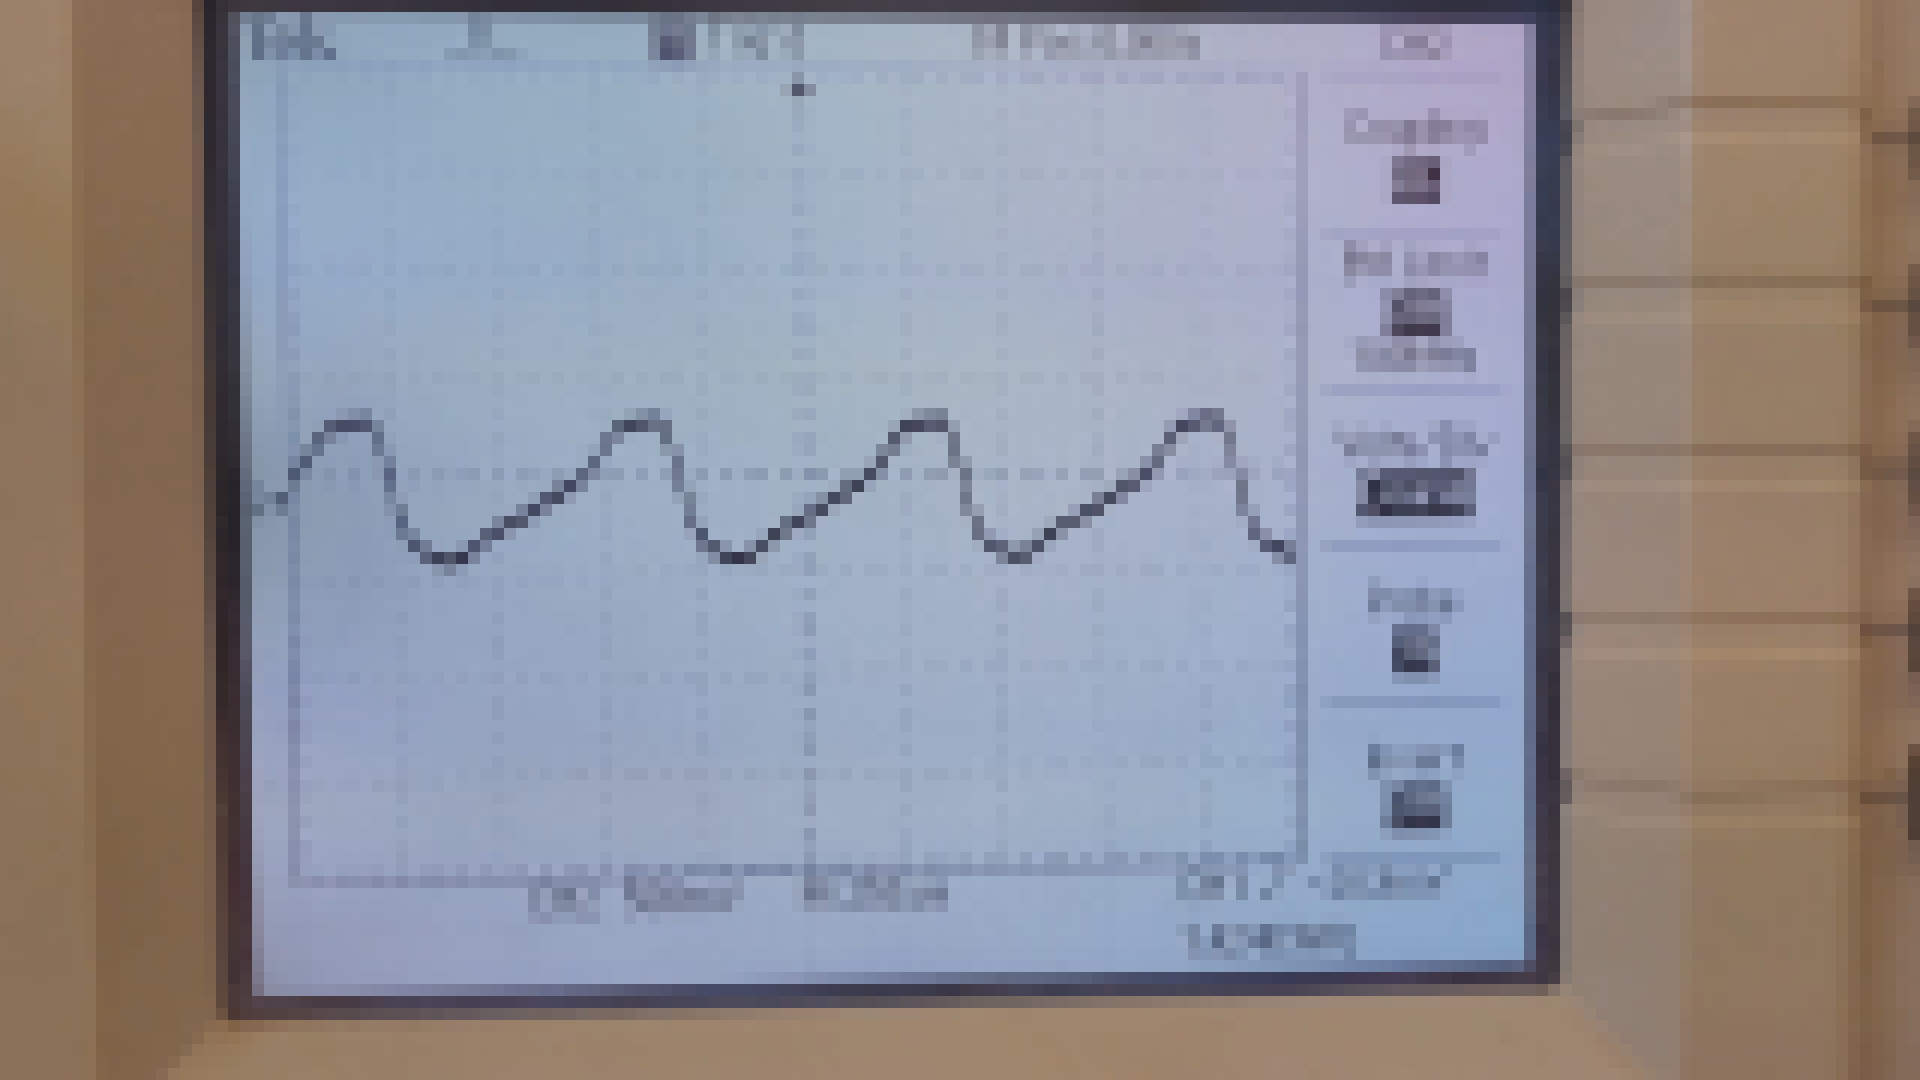

┌ Warning: Output swatches are reduced due to the large size (1080×1920).
│ Load the ImageShow package for large images.
└ @ Colors ~/.julia/packages/Colors/E2qak/src/display.jl:159


In [2]:
using VideoIO

# Open the video file
reader = VideoIO.openvideo("second.mp4")

# Get the total number of frames and duration of the video
_, dur = VideoIO.get_time_duration("second.mp4")
num_frames = VideoIO.get_number_frames("second.mp4")
time_per_frame = dur / num_frames

# Define the frame number to read
frame_number = 10

# Seek to the 10th frame (frame numbers are 0-based, so we seek to frame_number - 1)
seek(reader, frame_number - 1)

# Read the 10th frame
frame = read(reader)

# Get the timestamp of the 10th frame
frame_time = time_per_frame * frame_number

# Close the video reader
close(reader)

# Display the 10th frame and its timestamp
println("Frame Number: ", frame_number)
println("Timestamp: ", frame_time)
display(frame)


<h1 style="font-size: 36px;">Here we show what the processImage function does.</h1>


<h1 style="font-size: 36px;">Changing the epsilon parameter allows to adjust how the pixels are connected here is an example of a high value:</h1>

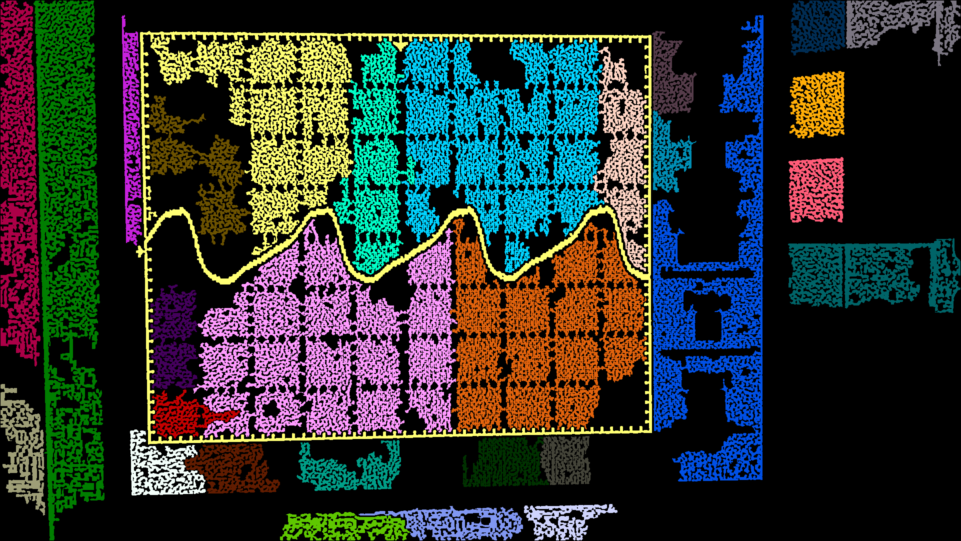

In [13]:

processImage(imfilter(frame, Kernel.Laplacian()), 30, 30, 2, 2)


<h1 style="font-size: 36px;">An example of a low value:</h1>

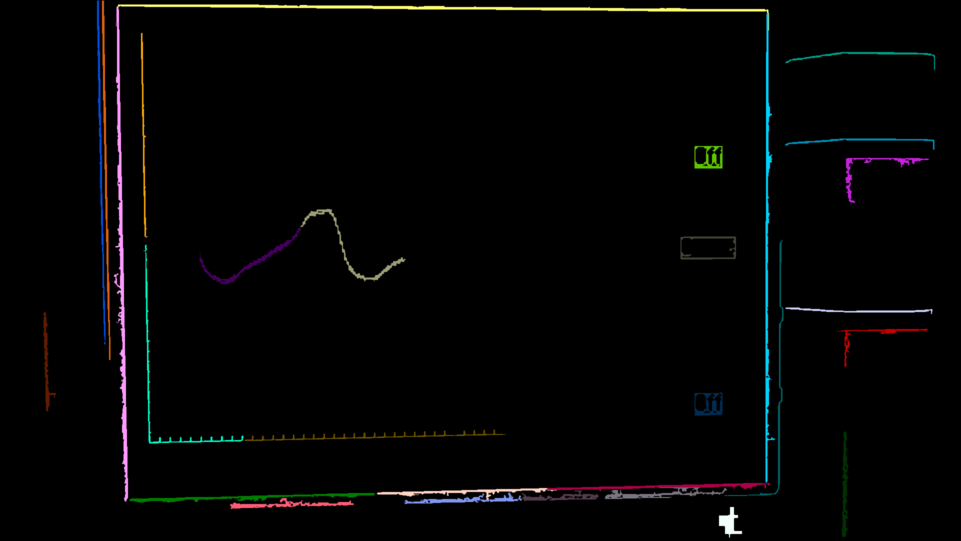

In [12]:
processImage(imfilter(frame, Kernel.Laplacian()), 30, 30, 2, 0.2)

<h1 style="font-size: 36px;">Changing the sigma parameter allows to adjust much we smoothen the image before proccessing it, here is an example of a high value:</h1>

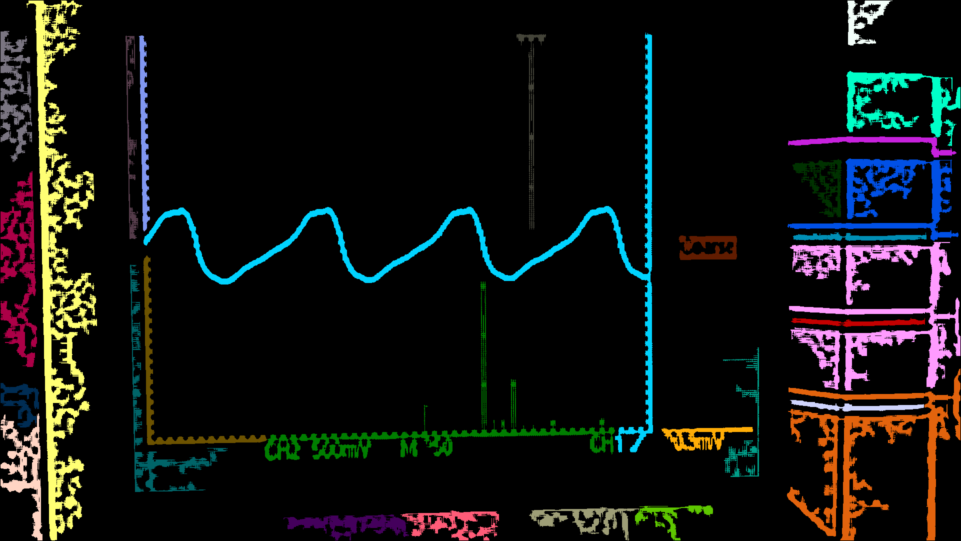

In [14]:
pic = processImage(imfilter(frame, Kernel.Laplacian()), 30, 30, 5, 0.7)

<h1 style="font-size: 36px;">Here we can demonstate what happens when keep two many segments from graph which results in not retaining the signal (there segemtns with a closer center of mass) :</h1>

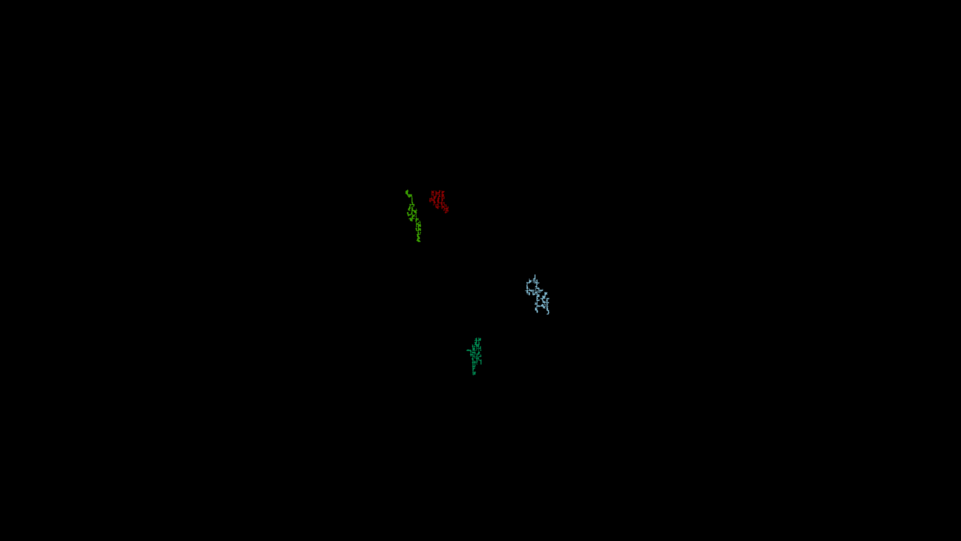

In [22]:
processImage(imfilter(frame, Kernel.Laplacian()), 5, 200, 2, 0.7)

<h1 style="font-size: 36px;">Retaining to many many componenets :</h1>

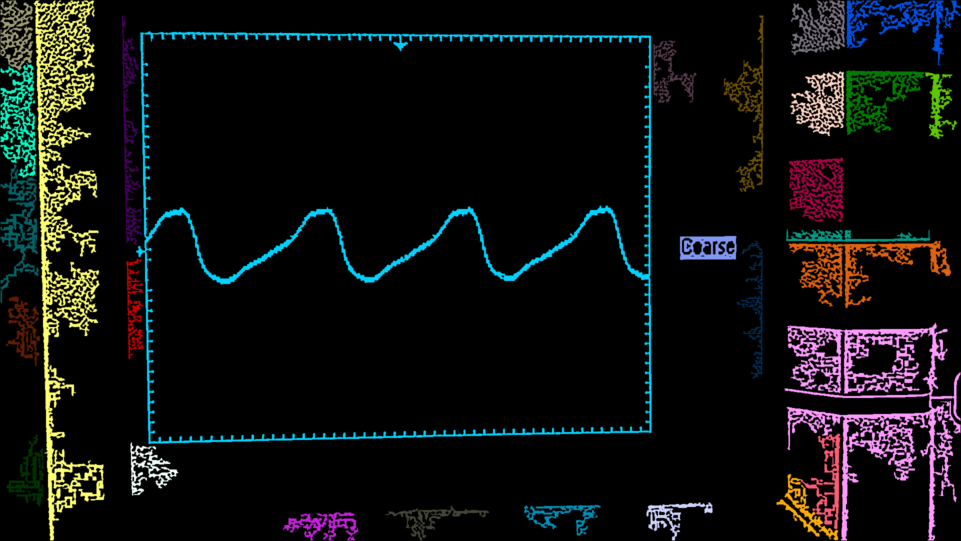

In [16]:
processImage(imfilter(frame, Kernel.Laplacian()), 30, 30, 2, 0.7)

<h1 style="font-size: 36px;">Using the right balance of parameters:</h1>

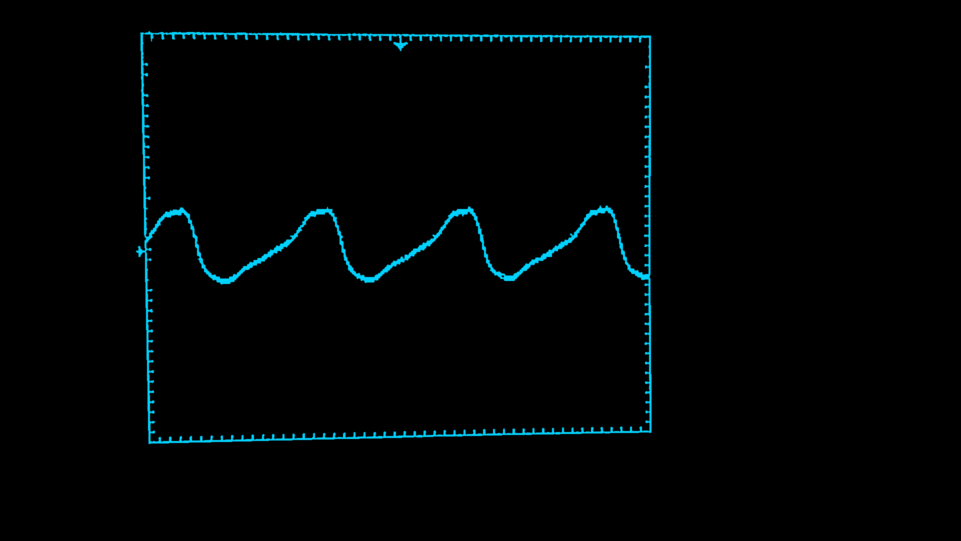

In [18]:
pic=processImage(imfilter(frame, Kernel.Laplacian()), 2, 30, 2, 0.7)

<h1 style="font-size: 36px;">The transformImage function uses a homography to transform the image to the plan of the camera. It assumes thet the image has four points at the corneres of the image</h1>

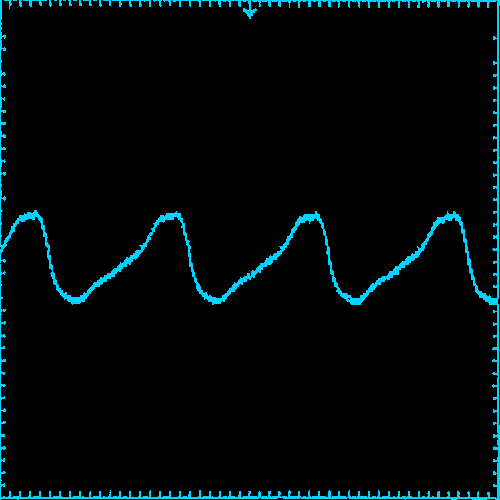

In [6]:
pic2 = transformImage(pic, 500)

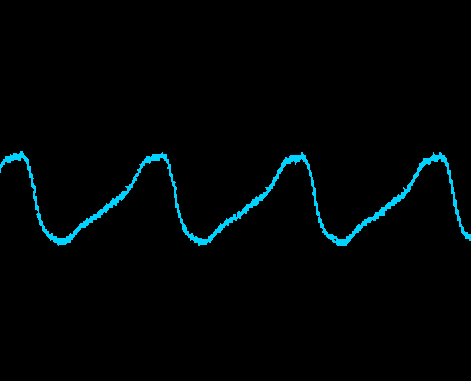

In [7]:

pic3 = pic2[60:440, 15:485]


<h1 style="font-size: 36px;">Finding the center of mass for each column of pixels the get_signal function can create injective data</h1>

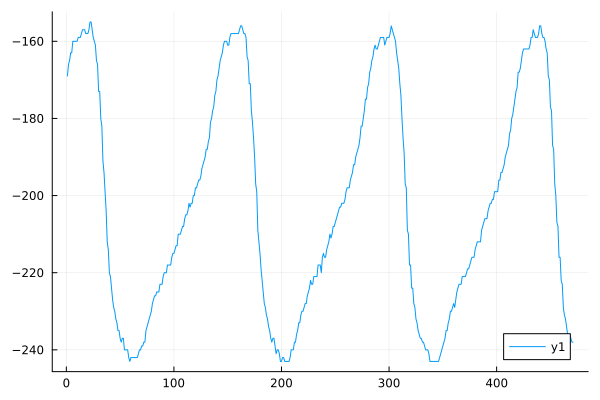

In [9]:

sig = get_signal(pic3)
plot(sig)